In [4]:
# ref
# HF = -226.829255645154
# CCSD = -0.7472246203302431
# CCSD(T) = -0.19159379323039
# AFQMC_PT = -227.622901 +/- 0.008102
# AFQMC_PT2 = -227.565442 +/- 0.002477
ref_ccsd = -0.7472246203302431
ref_ccsd_t = ref_ccsd + -0.19159379323039
ref_afqmc_pt = -227.622901 - -226.829255645154
ref_afqmc_pt2 = -227.565442 - -226.829255645154
print(ref_ccsd_t)
print(ref_afqmc_pt)
print(ref_afqmc_pt2)
data = '''
#   thresh      CCSD          CCSD(T)           AFQMC/CCSD_PT2             mp2_cr
    1e-4    -0.66406353     -0.06352460     -0.658416 +/- 0.001281      -0.01527036
    1e-5    -0.73270823     -0.14063654     -0.723979 +/- 0.001910      -0.00221271
    1e-6    -0.74637680     -0.18213435     -0.737111 +/- 0.002091      -0.00009628  
    1e-7    -0.74719442     -0.18943009     -0.733868 +/- 0.002153      -0.00000258
#   ref     -0.74722462     -0.19159379     -0.736186 +/- 0.002477           -
'''
import numpy as np
thresh = []
ccsd = []
ccsd_t = []
afqmc_pt2 = []
afqmc_pt2_err = []
mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        ccsd = np.hstack((ccsd,[float(parts[1])]))
        ccsd_t = np.hstack((ccsd_t,[float(parts[2])]))
        afqmc_pt2 = np.hstack((afqmc_pt2,[float(parts[3])]))
        afqmc_pt2_err = np.hstack((afqmc_pt2_err,[float(parts[5])]))
        mp2cr = np.hstack((mp2cr,[float(parts[6])]))

ccsd_t = ccsd_t + ccsd

ref_ccsd = [ref_ccsd]*len(ccsd)
ref_ccsd_t = [ref_ccsd_t]*len(ccsd_t)
ref_afqmc_pt2 = [ref_afqmc_pt2]*len(afqmc_pt2)
ref_afqmc_pt = [ref_afqmc_pt]*len(afqmc_pt2)

-0.938818413560633
-0.7936453548460065
-0.7361863548459837


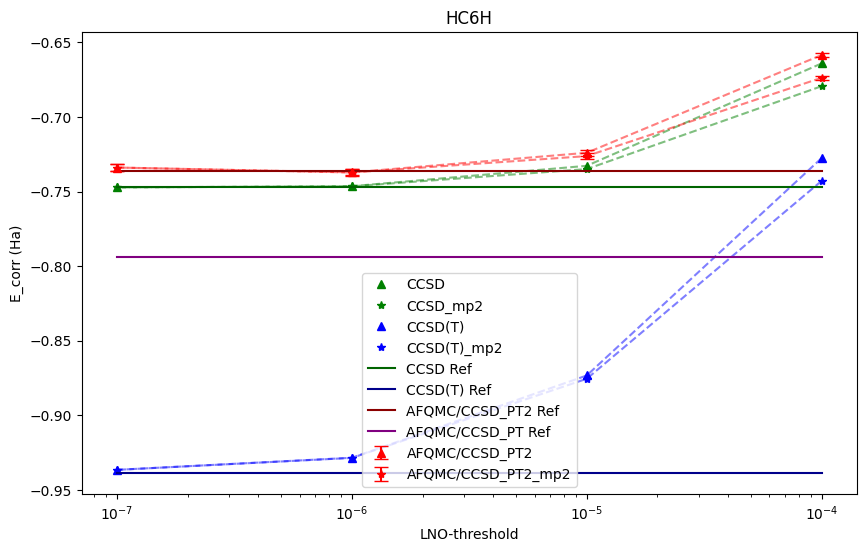

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(thresh,ccsd,'^',color='green',label='CCSD')
plt.plot(thresh,ccsd,'--',color='green',alpha=0.5)
plt.plot(thresh,ccsd+mp2cr,'*',color='green',label='CCSD_mp2')
plt.plot(thresh,ccsd+mp2cr,'--',color='green',alpha=0.5)
plt.plot(thresh,ccsd_t,'^',color='blue',label='CCSD(T)')
plt.plot(thresh,ccsd_t,'--',color='blue',alpha=0.5)
plt.plot(thresh,ccsd_t+mp2cr,'*',color='blue',label='CCSD(T)_mp2')
plt.plot(thresh,ccsd_t+mp2cr,'--',color='blue',alpha=0.5)
plt.errorbar(thresh,afqmc_pt2,afqmc_pt2_err,fmt='^',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.plot(thresh,afqmc_pt2,'--',color='red',alpha = 0.5)
plt.errorbar(thresh,afqmc_pt2+mp2cr,afqmc_pt2_err,fmt='*',capsize=5, color='red', label='AFQMC/CCSD_PT2_mp2')
plt.plot(thresh,afqmc_pt2+mp2cr,'--',color='red',alpha = 0.5)
plt.plot(thresh,ref_ccsd,'-',color='darkgreen',label='CCSD Ref')
plt.plot(thresh,ref_ccsd_t,'-',color='darkblue',label='CCSD(T) Ref')
plt.plot(thresh,ref_afqmc_pt2,'-', color='darkred', label='AFQMC/CCSD_PT2 Ref')
plt.plot(thresh,ref_afqmc_pt,'-', color='purple', label='AFQMC/CCSD_PT Ref')
plt.xscale('log')
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('HC6H')
plt.legend()
plt.show()

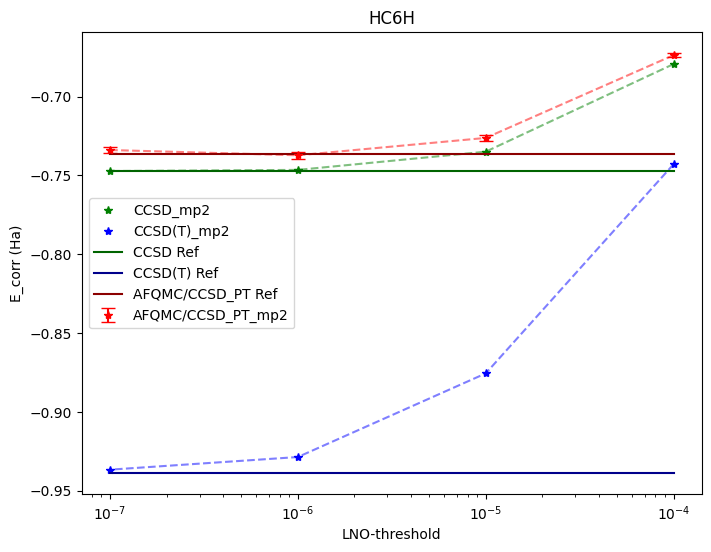

In [3]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(thresh,ccsd+mp2cr,'*',color='green',label='CCSD_mp2')
plt.plot(thresh,ccsd+mp2cr,'--',color='green',alpha=0.5)
plt.plot(thresh,ccsd_t+mp2cr,'*',color='blue',label='CCSD(T)_mp2')
plt.plot(thresh,ccsd_t+mp2cr,'--',color='blue',alpha=0.5)
plt.errorbar(thresh,afqmc_pt2+mp2cr,afqmc_pt2_err,fmt='*',capsize=5, color='red', label='AFQMC/CCSD_PT_mp2')
plt.plot(thresh,afqmc_pt2+mp2cr,'--',color='red',alpha = 0.5)
plt.plot(thresh,ref_ccsd,'-',color='darkgreen',label='CCSD Ref')
plt.plot(thresh,ref_ccsd_t,'-',color='darkblue',label='CCSD(T) Ref')
plt.plot(thresh,ref_afqmc_pt2,'-', color='darkred', label='AFQMC/CCSD_PT Ref')
plt.xscale('log')
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('HC6H')
plt.legend()
plt.show()